In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import *

from skimage.io import imread

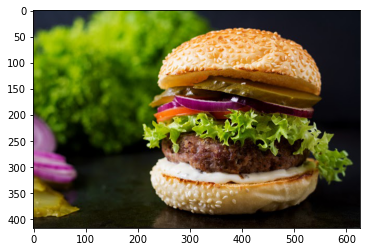

In [72]:
burger = imread("https://lh4.googleusercontent.com/O4xOxs7rftenKIzA9C5Ujarfrtn-z26IPrOZn9yLSMOfNBISUk4G8ESmUGqqIf3MNLLlQQgVWPHcHRKN4hJdKRTvQ_Hj3eQz5py1dE-r3eukcU8sAIHAPC6M4n-9SAct=w626")
plt.imshow(burger)

In [70]:
burger.shape

(417, 626, 3)

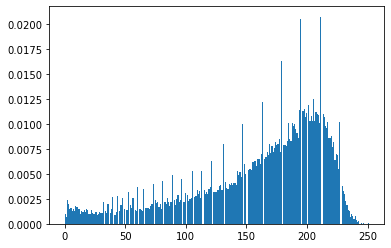

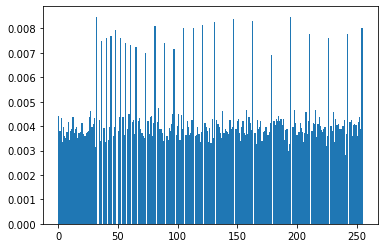

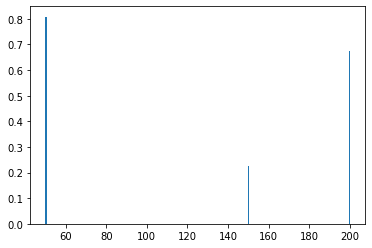

In [68]:
def to_grayscale(rgb):    
    grayscale = 0.299 * rgb[:,:,0] + 0.587 * rgb[:,:,1] + 0.114 * rgb[:,:,2]
    return grayscale
    

image = imread("https://lh3.googleusercontent.com/TFbk69lUUVUhHgGKV78HnRHc-bke-z5PGCn2FatVeCLQKbmxMwE_H_rZhieQfT0S_Loq7vPVB7kojAwyLlEBV1Wk3cdLmeCcP2-S0UC7LbKHUuxrVKt2F808Q1kxEeUe=w692")

cat = image[25:215,12:205]
noise = image[25:215, 250:440]
tree = image[25:215,485:680]

for element in cat,noise,tree:
    plt.hist(to_grayscale(element).ravel(), bins=256, density=True)
    plt.show()

In [85]:
burger_red = burger[:,:,0]
burger_green = burger[:,:,1]
burger_blue = burger[:,:,2]

burger_red.mean(), burger_green.mean(), burger_blue.mean()
round(burger_red_mean,2)

90.04

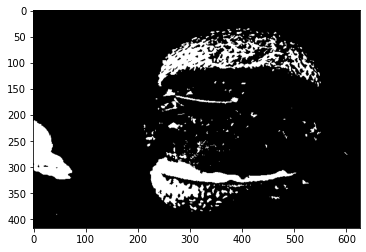

Counter({0: 236547, 1: 24495})

In [93]:
burger_blue_binary = burger_blue.copy()
threshold = 128
burger_blue_binary[burger_blue_binary <= threshold] = 0
burger_blue_binary[burger_blue_binary > threshold] = 1

plt.imshow(burger_blue_binary, "gray")
plt.show()

Counter(burger_blue_binary.ravel())

## Text processing

In [124]:
with open("data/gutenberg.txt", "r", encoding="utf-8") as file:
    text = file.read()

text_words = [word.lower() for word in re.split("\W", text) if word != ""]
Counter(text_words)["pride"]

#text_words_stem = [PorterStemmer().stem(word) for word in text_words]
#Counter(text_words_stem).most_common()

52

In [116]:
Counter(text_words)["prejudice"]

10

In [117]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aenlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [127]:
english_stopwords = stopwords.words("english")
text_words_clean= [word for word in text_words if word not in english_stopwords]
Counter(text_words_clean).most_common()

[('mr', 785),
 ('elizabeth', 635),
 ('could', 526),
 ('would', 468),
 ('darcy', 417),
 ('said', 401),
 ('mrs', 343),
 ('much', 327),
 ('bennet', 323),
 ('must', 315),
 ('bingley', 306),
 ('jane', 294),
 ('miss', 283),
 ('one', 270),
 ('know', 237),
 ('though', 226),
 ('well', 224),
 ('never', 218),
 ('sister', 217),
 ('soon', 216),
 ('think', 211),
 ('may', 207),
 ('time', 203),
 ('good', 200),
 ('might', 200),
 ('every', 197),
 ('wickham', 194),
 ('lady', 191),
 ('little', 187),
 ('collins', 180),
 ('without', 178),
 ('nothing', 177),
 ('lydia', 171),
 ('make', 168),
 ('shall', 163),
 ('say', 160),
 ('dear', 158),
 ('see', 152),
 ('man', 151),
 ('family', 151),
 ('room', 150),
 ('first', 145),
 ('day', 144),
 ('great', 142),
 ('mother', 137),
 ('however', 135),
 ('father', 135),
 ('two', 131),
 ('young', 130),
 ('ever', 130),
 ('give', 127),
 ('made', 126),
 ('catherine', 126),
 ('chapter', 122),
 ('hope', 122),
 ('many', 122),
 ('us', 122),
 ('away', 120),
 ('last', 120),
 ('always',